<a href="https://colab.research.google.com/github/avitripathi15/starter-hugo-academic/blob/master/flower_recognition_alternate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
import pathlib

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

228827136/228813984 [==============================] - 2s 0us/step
3670


In [ ]:
batch_size = 32
img_height = 225
img_width = 225

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


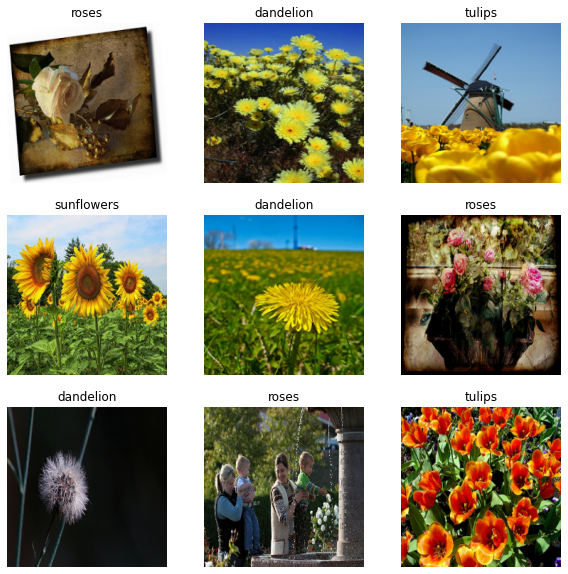

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=[64,64,3]),
  layers.MaxPooling2D(pool_size=2,strides=2),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=[64,64,3]),
  layers.MaxPooling2D(pool_size=2,strides=2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2 , strides=2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2 , strides=2),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 160s 2s/step - loss: 1.5464 - accuracy: 0.3689 - val_loss: 1.1946 - val_accuracy: 0.5218
Epoch 2/15
92/92 [==============================] - 156s 2s/step - loss: 1.1214 - accuracy: 0.5392 - val_loss: 1.0215 - val_accuracy: 0.5940
Epoch 3/15
92/92 [==============================] - 156s 2s/step - loss: 0.9988 - accuracy: 0.6069 - val_loss: 0.9387 - val_accuracy: 0.6185
Epoch 4/15
92/92 [==============================] - 155s 2s/step - loss: 0.9435 - accuracy: 0.6339 - val_loss: 0.8821 - val_accuracy: 0.6458
Epoch 5/15
92/92 [==============================] - 158s 2s/step - loss: 0.8724 - accuracy: 0.6628 - val_loss: 0.8434 - val_accuracy: 0.6553
Epoch 6/15
92/92 [==============================] - 155s 2s/step - loss: 0.8463 - accuracy: 0.6679 - val_loss: 0.8190 - val_accuracy: 0.6798
Epoch 7/15
92/92 [==============================] - 155s 2s/step - loss: 0.8244 - accuracy: 0.6792 - val_loss: 0.8190 - val_accuracy: 0.6812
Epoch 8/15
92/92 [======

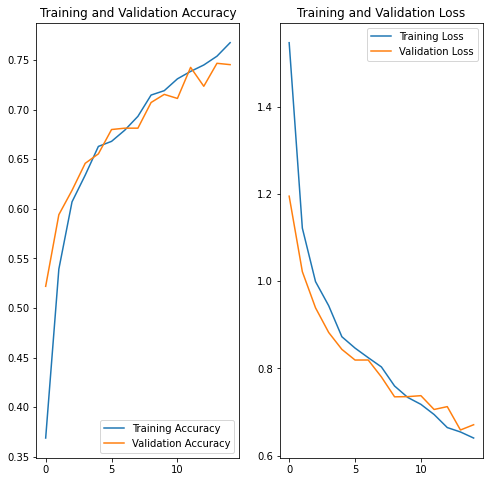

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=[64,64,3]),
  layers.MaxPooling2D(pool_size=2,strides=2),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=[64,64,3]),
  layers.MaxPooling2D(pool_size=2,strides=2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2 , strides=2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2 , strides=2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2 , strides=2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2 , strides=2),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='softmax')
])

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 128s 1s/step - loss: 1.9119 - accuracy: 0.2262 - val_loss: 1.5137 - val_accuracy: 0.2943
Epoch 2/15
92/92 [==============================] - 124s 1s/step - loss: 1.3596 - accuracy: 0.3910 - val_loss: 1.1541 - val_accuracy: 0.5000
Epoch 3/15
92/92 [==============================] - 125s 1s/step - loss: 1.1986 - accuracy: 0.4653 - val_loss: 1.0363 - val_accuracy: 0.5640
Epoch 4/15
92/92 [==============================] - 124s 1s/step - loss: 1.0948 - accuracy: 0.5443 - val_loss: 0.9878 - val_accuracy: 0.6022
Epoch 5/15
92/92 [==============================] - 124s 1s/step - loss: 1.0038 - accuracy: 0.5964 - val_loss: 0.8946 - val_accuracy: 0.6594
Epoch 6/15
92/92 [==============================] - 124s 1s/step - loss: 0.9529 - accuracy: 0.6230 - val_loss: 0.9035 - val_accuracy: 0.6172
Epoch 7/15
92/92 [==============================] - 123s 1s/step - loss: 0.8975 - accuracy: 0.6482 - val_loss: 0.9279 - val_accuracy: 0.6431
Epoch 8/15
92/92 [======

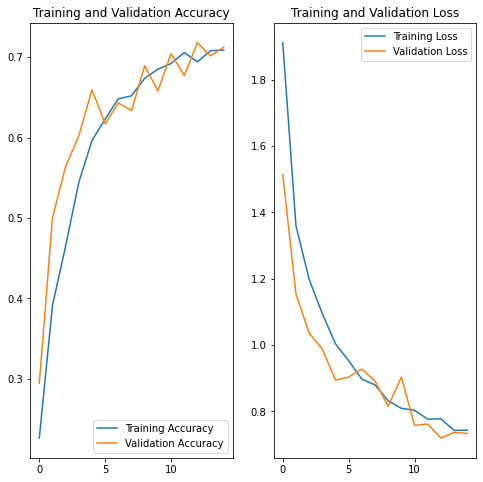

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Checking the behaviour of the model by changing different hyperparameter and changing convolution layers**

### **The maximum accuracy achived was 76.57%**